In [1]:
token='02c67819-12f8-49a0-928f-92dde0e609ae'
json_str='{"studyIds":["blca_mskcc_solit_2014"],"pageSize":999999,"pageIndex":1,"attributesRangeFilters":[],"attributesEqualFilters":[],"mutationFilter":{"hugoGeneSymbols":[],"exacStart":0,"exadEnd":1,"vabundStart":0,"vabundEnd":1,"variantSource":[],"variantType":[],"variantClass":[],"sequencer":[],"sequencerSource":[],"searchStr":""}}'
host='https://peta.bgi.com/api'

启动python环境

In [2]:


tryCatch({
    library(reticulate)
    use_condaenv("r-reticulate")

 },error=function(e){
     print(e)
 } )

调用pypeta获取数据

In [3]:

tryCatch({
    pypyta<- import("pypeta")
    peta=pypyta$Peta(token=token)
    peta$set_data_restriction_from_json_string(json_str)
    mut<-peta$fetch_mutation_data()
    cli=peta$fetch_clinical_data()
    names(cli)[names(cli) =='sampleId'] <- 'Tumor_Sample_Barcode'

 },error=function(e){
     print(e)
 } )


以上为PETA系统IRKernel报告模板的必备固定代码，maf格式的突变信息和tsv格式的临床信息分别以dataframe格式存储于变量mut和cli中。下方为用户自定义代码，以执行各类分析和可视化功能。

In [4]:
tryCatch({
    library(maftools)    
    laml = read.maf(maf = mut,clinicalData=cli,verbose = F)

 },error=function(e){
     print(e)
 } )


# 数据选择条件

In [5]:
tryCatch({
    json<-import("json")
    json$loads(json_str)

 },error=function(e){
     print(e)
 } )


$studyIds
[1] "blca_mskcc_solit_2014"

$pageSize
[1] 999999

$pageIndex
[1] 1

$attributesRangeFilters
list()

$attributesEqualFilters
list()

$mutationFilter
$mutationFilter$hugoGeneSymbols
list()

$mutationFilter$exacStart
[1] 0

$mutationFilter$exadEnd
[1] 1

$mutationFilter$vabundStart
[1] 0

$mutationFilter$vabundEnd
[1] 1

$mutationFilter$variantSource
list()

$mutationFilter$variantType
list()

$mutationFilter$variantClass
list()

$mutationFilter$sequencer
list()

$mutationFilter$sequencerSource
list()

$mutationFilter$searchStr
[1] ""

# 基因组特征

## 临床属性分布
暂未实现

## 样本级别变异分布

In [6]:

tryCatch({
     #Shows sample summry.
    getSampleSummary(laml)
 },error=function(e){
     print(e)
 } )

Tumor_Sample_Barcode,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Splice_Site,Translation_Start_Site,total
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
DS-bla-083,0,0,0,0,32,11,3,0,46
DS-bla-095,0,2,1,0,35,4,1,0,43
DS-bla-016,1,0,1,0,37,2,0,0,41
DS-bla-044,0,0,0,0,31,4,0,0,35
DS-bla-080,0,0,0,0,25,8,0,0,33
DS-bla-054,2,0,0,0,29,1,0,0,32
DS-bla-111,1,0,0,0,24,4,0,1,30
DS-bla-101,0,0,0,0,21,6,1,0,28
DS-bla-062,2,1,0,0,16,4,0,0,23


## 基因水平变异分布

In [7]:

tryCatch({
     #Shows gene summary.
    getGeneSummary(laml)
 },error=function(e){
     print(e)
 } )

Hugo_Symbol,Frame_Shift_Del,Frame_Shift_Ins,In_Frame_Del,In_Frame_Ins,Missense_Mutation,Nonsense_Mutation,Splice_Site,Translation_Start_Site,total,MutatedSamples,AlteredSamples
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
TP53,4,5,1,0,55,11,2,0,78,63,63
KDM6A,11,10,0,0,6,17,4,0,48,45,45
KMT2D,11,5,1,0,20,17,2,0,56,34,34
ARID1A,11,6,2,0,5,17,0,0,41,31,31
RB1,7,3,0,0,4,12,2,0,28,25,25
PIK3CA,0,1,0,0,24,0,0,0,25,25,25
FGFR3,0,0,0,0,22,0,0,0,22,21,21
EP300,3,2,1,0,11,4,0,0,21,17,17
STAG2,6,2,0,1,3,6,0,0,18,16,16


## 变异图谱

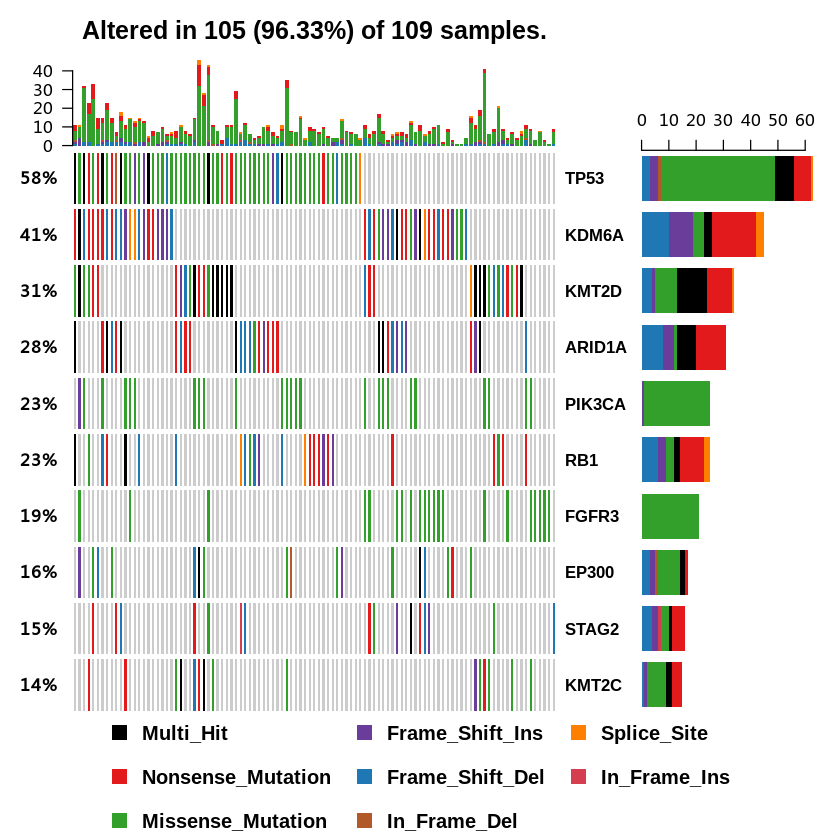

In [8]:

tryCatch({
    oncoplot(maf = laml, top = 10)

 },error=function(e){
     print(e)
 } )



## 变异分布特性图示

Warning message in data.table::melt(colSums(titv.counts[, 2:7, with = FALSE])):
“The melt generic in data.table has been passed a numeric and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(colSums(titv.counts[, 2:7, with = FALSE])). In the next version, this warning will become an error.”


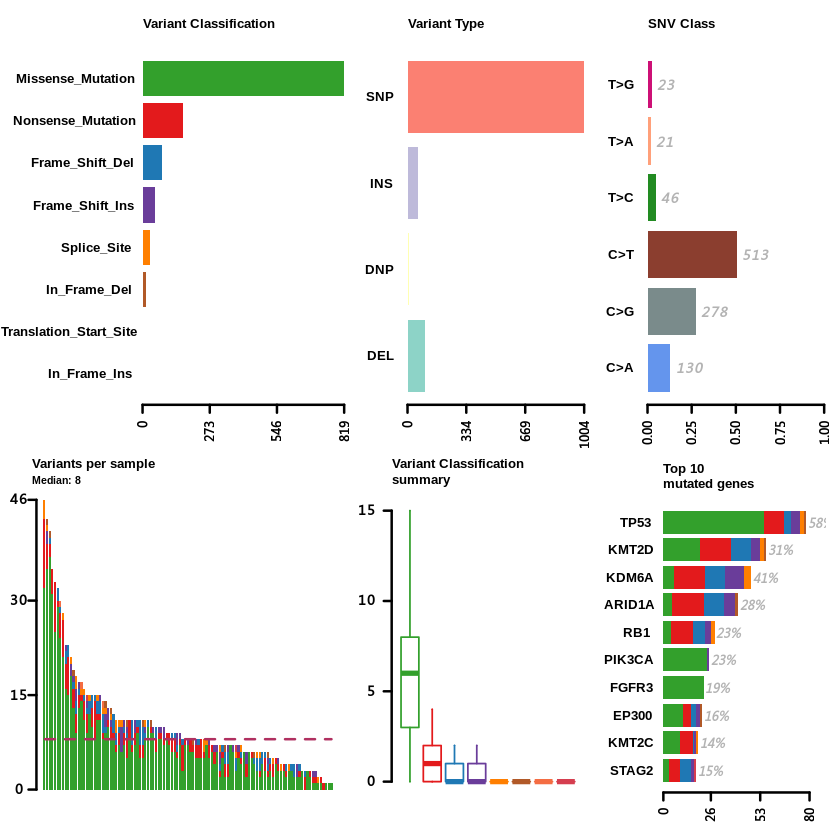

In [9]:
 tryCatch({
     plotmafSummary(maf = laml, rmOutlier = TRUE, addStat = 'median', dashboard = TRUE, titvRaw = FALSE)
 },error=function(e){
     print(e)
 } )

## Ti/Tv 

NULL

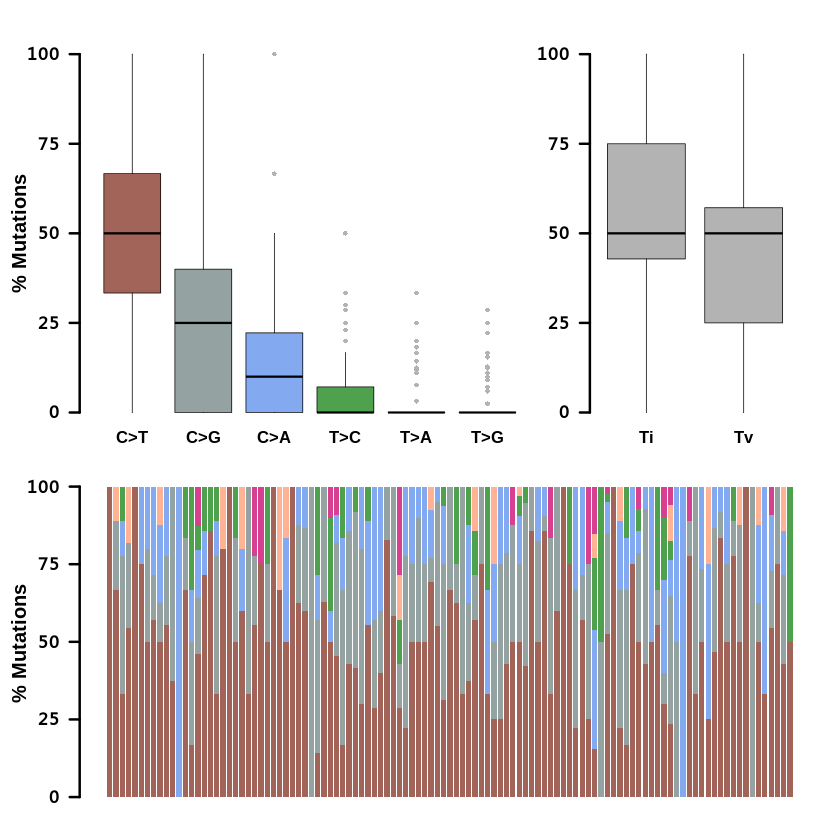

In [10]:
tryCatch({
     laml.titv = titv(maf = laml, plot = FALSE, useSyn = TRUE)
     plotTiTv(res = laml.titv)
 },error=function(e){
     print(e)
 } )

## TMB 与 TCGA比较 

Summary..



      Cohort Cohort_Size Median_Mutations
 1:     SKCM         468            315.0
 2:     LUSC         494            187.5
 3:     LUAD         567            158.0
 4:     BLCA         412            131.5
 5:     ESCA         184             85.0
 6:     HNSC         509             82.0
 7:     STAD         439             82.0
 8:     DLBC          48             81.5
 9:     UCEC         542             78.0
10:     COAD         433             76.0
11:       OV         443             72.0
12:     LIHC         374             67.0
13:     CESC         305             66.0
14:     READ         158             63.0
15:     KIRP         288             53.0
16:     KIRC         339             44.0
17:      UCS          57             35.0
18:     BRCA        1044             34.0
19:      GBM         395             32.0
20:     SARC         255             31.0
21:     CHOL          51             30.0
22:     MESO          83             25.0
23:     PAAD         178          

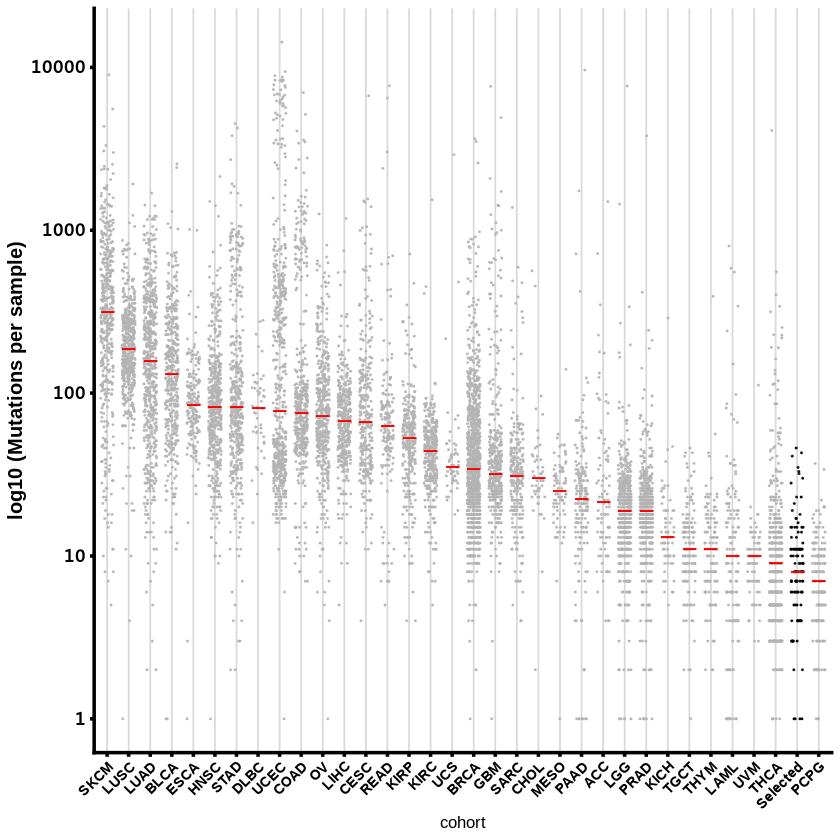

In [11]:
tryCatch({
     laml.mutload = tcgaCompare(maf = laml, cohortName = 'Selected')
 },error=function(e){
     print(e)
 } )

## 突变基因云图

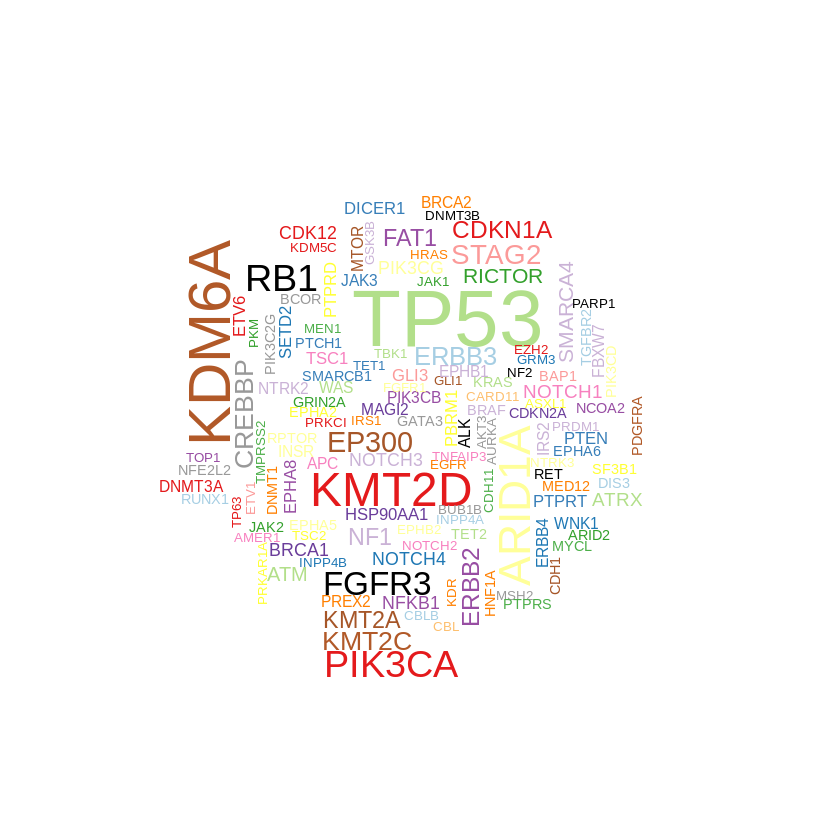

In [12]:
tryCatch({
     geneCloud(input = laml, minMut = 2)
 },error=function(e){
     print(e)
 } )

## 突变互斥共存特征分析

Checking for Gene sets.. 

k = 3: 56 combinations..

Geneset: TP53, FGFR3, KMT2C

Geneset: TP53, FGFR3, KMT2D

Geneset: TP53, FGFR3, ARID1A

Geneset: TP53, FGFR3, RB1

Geneset: TP53, FGFR3, KDM6A

Geneset: TP53, FGFR3, SMARCA4

Geneset: TP53, KMT2C, KMT2D

Geneset: TP53, KMT2C, ARID1A

Geneset: TP53, KMT2C, RB1

Geneset: TP53, KMT2C, KDM6A

Geneset: TP53, KMT2C, SMARCA4

Geneset: TP53, KMT2D, ARID1A

Geneset: TP53, KMT2D, RB1

Geneset: TP53, KMT2D, KDM6A

Geneset: TP53, KMT2D, SMARCA4

Geneset: TP53, ARID1A, RB1

Geneset: TP53, ARID1A, KDM6A

Geneset: TP53, ARID1A, SMARCA4

Geneset: TP53, RB1, KDM6A

Geneset: TP53, RB1, SMARCA4

Geneset: TP53, KDM6A, SMARCA4

Geneset: FGFR3, KMT2C, KMT2D

Geneset: FGFR3, KMT2C, ARID1A

Geneset: FGFR3, KMT2C, RB1

Geneset: FGFR3, KMT2C, KDM6A

Geneset: FGFR3, KMT2C, SMARCA4

Geneset: FGFR3, KMT2D, ARID1A

Geneset: FGFR3, KMT2D, RB1

Geneset: FGFR3, KMT2D, KDM6A

Geneset: FGFR3, KMT2D, SMARCA4

Geneset: FGFR3, ARID1A, RB1

Geneset: FGFR3, ARID1A, KDM6A



                  gene_set       pvalue
 1:      KMT2C, RB1, KDM6A 8.398927e-05
 2:   TP53, FGFR3, SMARCA4 1.714221e-04
 3:      KMT2D, RB1, KDM6A 6.774965e-04
 4:     TP53, FGFR3, KMT2D 1.094460e-03
 5:     TP53, FGFR3, KMT2C 1.134527e-03
 6:     TP53, KMT2D, KDM6A 3.572884e-03
 7:  KMT2D, KDM6A, SMARCA4 5.564210e-03
 8:    TP53, FGFR3, ARID1A 9.421138e-03
 9:      FGFR3, KMT2C, RB1 9.948681e-03
10:  KMT2C, KDM6A, SMARCA4 1.134766e-02
11:    RB1, KDM6A, SMARCA4 1.227239e-02
12:      FGFR3, KMT2D, RB1 2.061571e-02
13: ARID1A, KDM6A, SMARCA4 3.690329e-02
14:   FGFR3, KMT2C, ARID1A 4.293703e-02
15:     TP53, FGFR3, KDM6A 4.316487e-02


gene1,gene2,pValue,oddsRatio,00,11,01,10,Event
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<chr>
TP53,FGFR3,9.716072e-06,0.07972875,28,3,18,60,Mutually_Exclusive
KMT2D,KMT2C,3.910566e-05,12.70902011,72,12,3,22,Co_Occurance
ATM,ERBB3,1.596072e-03,12.08566273,91,5,9,4,Co_Occurance
CDK12,FAT1,2.576144e-03,14.83307540,94,4,8,3,Co_Occurance
FGFR3,RB1,3.097152e-03,0.00000000,63,NA,25,21,Mutually_Exclusive
KMT2A,ERBB2,5.437836e-03,7.69102565,89,5,8,7,Co_Occurance
KMT2C,PIK3CA,5.750583e-03,5.07417509,77,8,17,7,Co_Occurance
ERBB2,TP53,6.920986e-03,10.42336239,45,12,51,1,Co_Occurance
FAT1,ERBB3,7.959145e-03,6.78187866,88,5,9,7,Co_Occurance


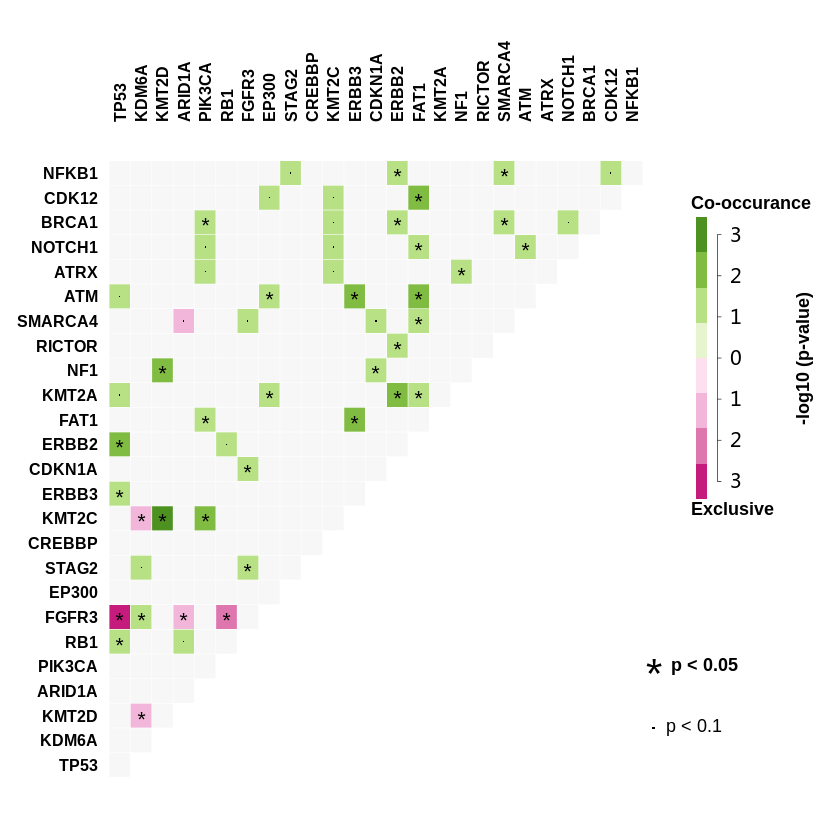

In [13]:

tryCatch({    
    somaticInteractions(maf = laml, top = 25, pvalue = c(0.05, 0.1))

 },error=function(e){
     print(e)
 } )